# DATA SCIENCE CAPSTONE

#### The purpouse of this notebook is to show how I developed my final project to the IBM Data Science course

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8e363007671e4506b5d78d64b8f7de37 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-pNmujbU6bd29W7rAHG3NVd7lHlNvXRl-Pn6rMekEELq',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8e363007671e4506b5d78d64b8f7de37.get_object(Bucket='datasciencecapstone-donotdelete-pr-buzsies4pmhwpx',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df_data_1.shape

(194673, 38)

In [5]:
df_data_1.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [6]:
df_data_1.dropna(subset=['WEATHER', 'ROADCOND', 'LIGHTCOND'], inplace=True)

In [7]:
df_data_1.isna().sum()

SEVERITYCODE           0
X                   5170
Y                   5170
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1812
INTKEY            125875
LOCATION            2554
EXCEPTRSNCODE     109842
EXCEPTRSNDESC     184510
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE         21
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6141
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    159614
UNDERINFL              0
WEATHER                0
ROADCOND               0
LIGHTCOND              0
PEDROWNOTGRNT     184672
SDOTCOLNUM         74500
SPEEDING          180018
ST_COLCODE            18
ST_COLDESC            21
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [8]:
df_data_1.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [9]:
df_data_1 = df_data_1.astype(str)
df_data_1.dtypes

SEVERITYCODE      object
X                 object
Y                 object
OBJECTID          object
INCKEY            object
COLDETKEY         object
REPORTNO          object
STATUS            object
ADDRTYPE          object
INTKEY            object
LOCATION          object
EXCEPTRSNCODE     object
EXCEPTRSNDESC     object
SEVERITYCODE.1    object
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT       object
PEDCOUNT          object
PEDCYLCOUNT       object
VEHCOUNT          object
INCDATE           object
INCDTTM           object
JUNCTIONTYPE      object
SDOT_COLCODE      object
SDOT_COLDESC      object
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT     object
SDOTCOLNUM        object
SPEEDING          object
ST_COLCODE        object
ST_COLDESC        object
SEGLANEKEY        object
CROSSWALKKEY      object
HITPARKEDCAR      object
dtype: object

In [10]:
!pip install git+https://github.com/shakedzy/dython.git

  Cloning https://github.com/shakedzy/dython.git to /home/dsxuser/.tmp/pip-req-build-euy7ae7f
  Running command git clone -q https://github.com/shakedzy/dython.git /home/dsxuser/.tmp/pip-req-build-euy7ae7f
  Stored in directory: /home/dsxuser/.tmp/pip-ephem-wheel-cache-cam_38pt/wheels/22/e0/2a/eb6a41c2901366c786f2cc8d9bcd73911e9a1e36c5f06be49b
Successfully built dython


In [11]:
from dython.nominal import associations

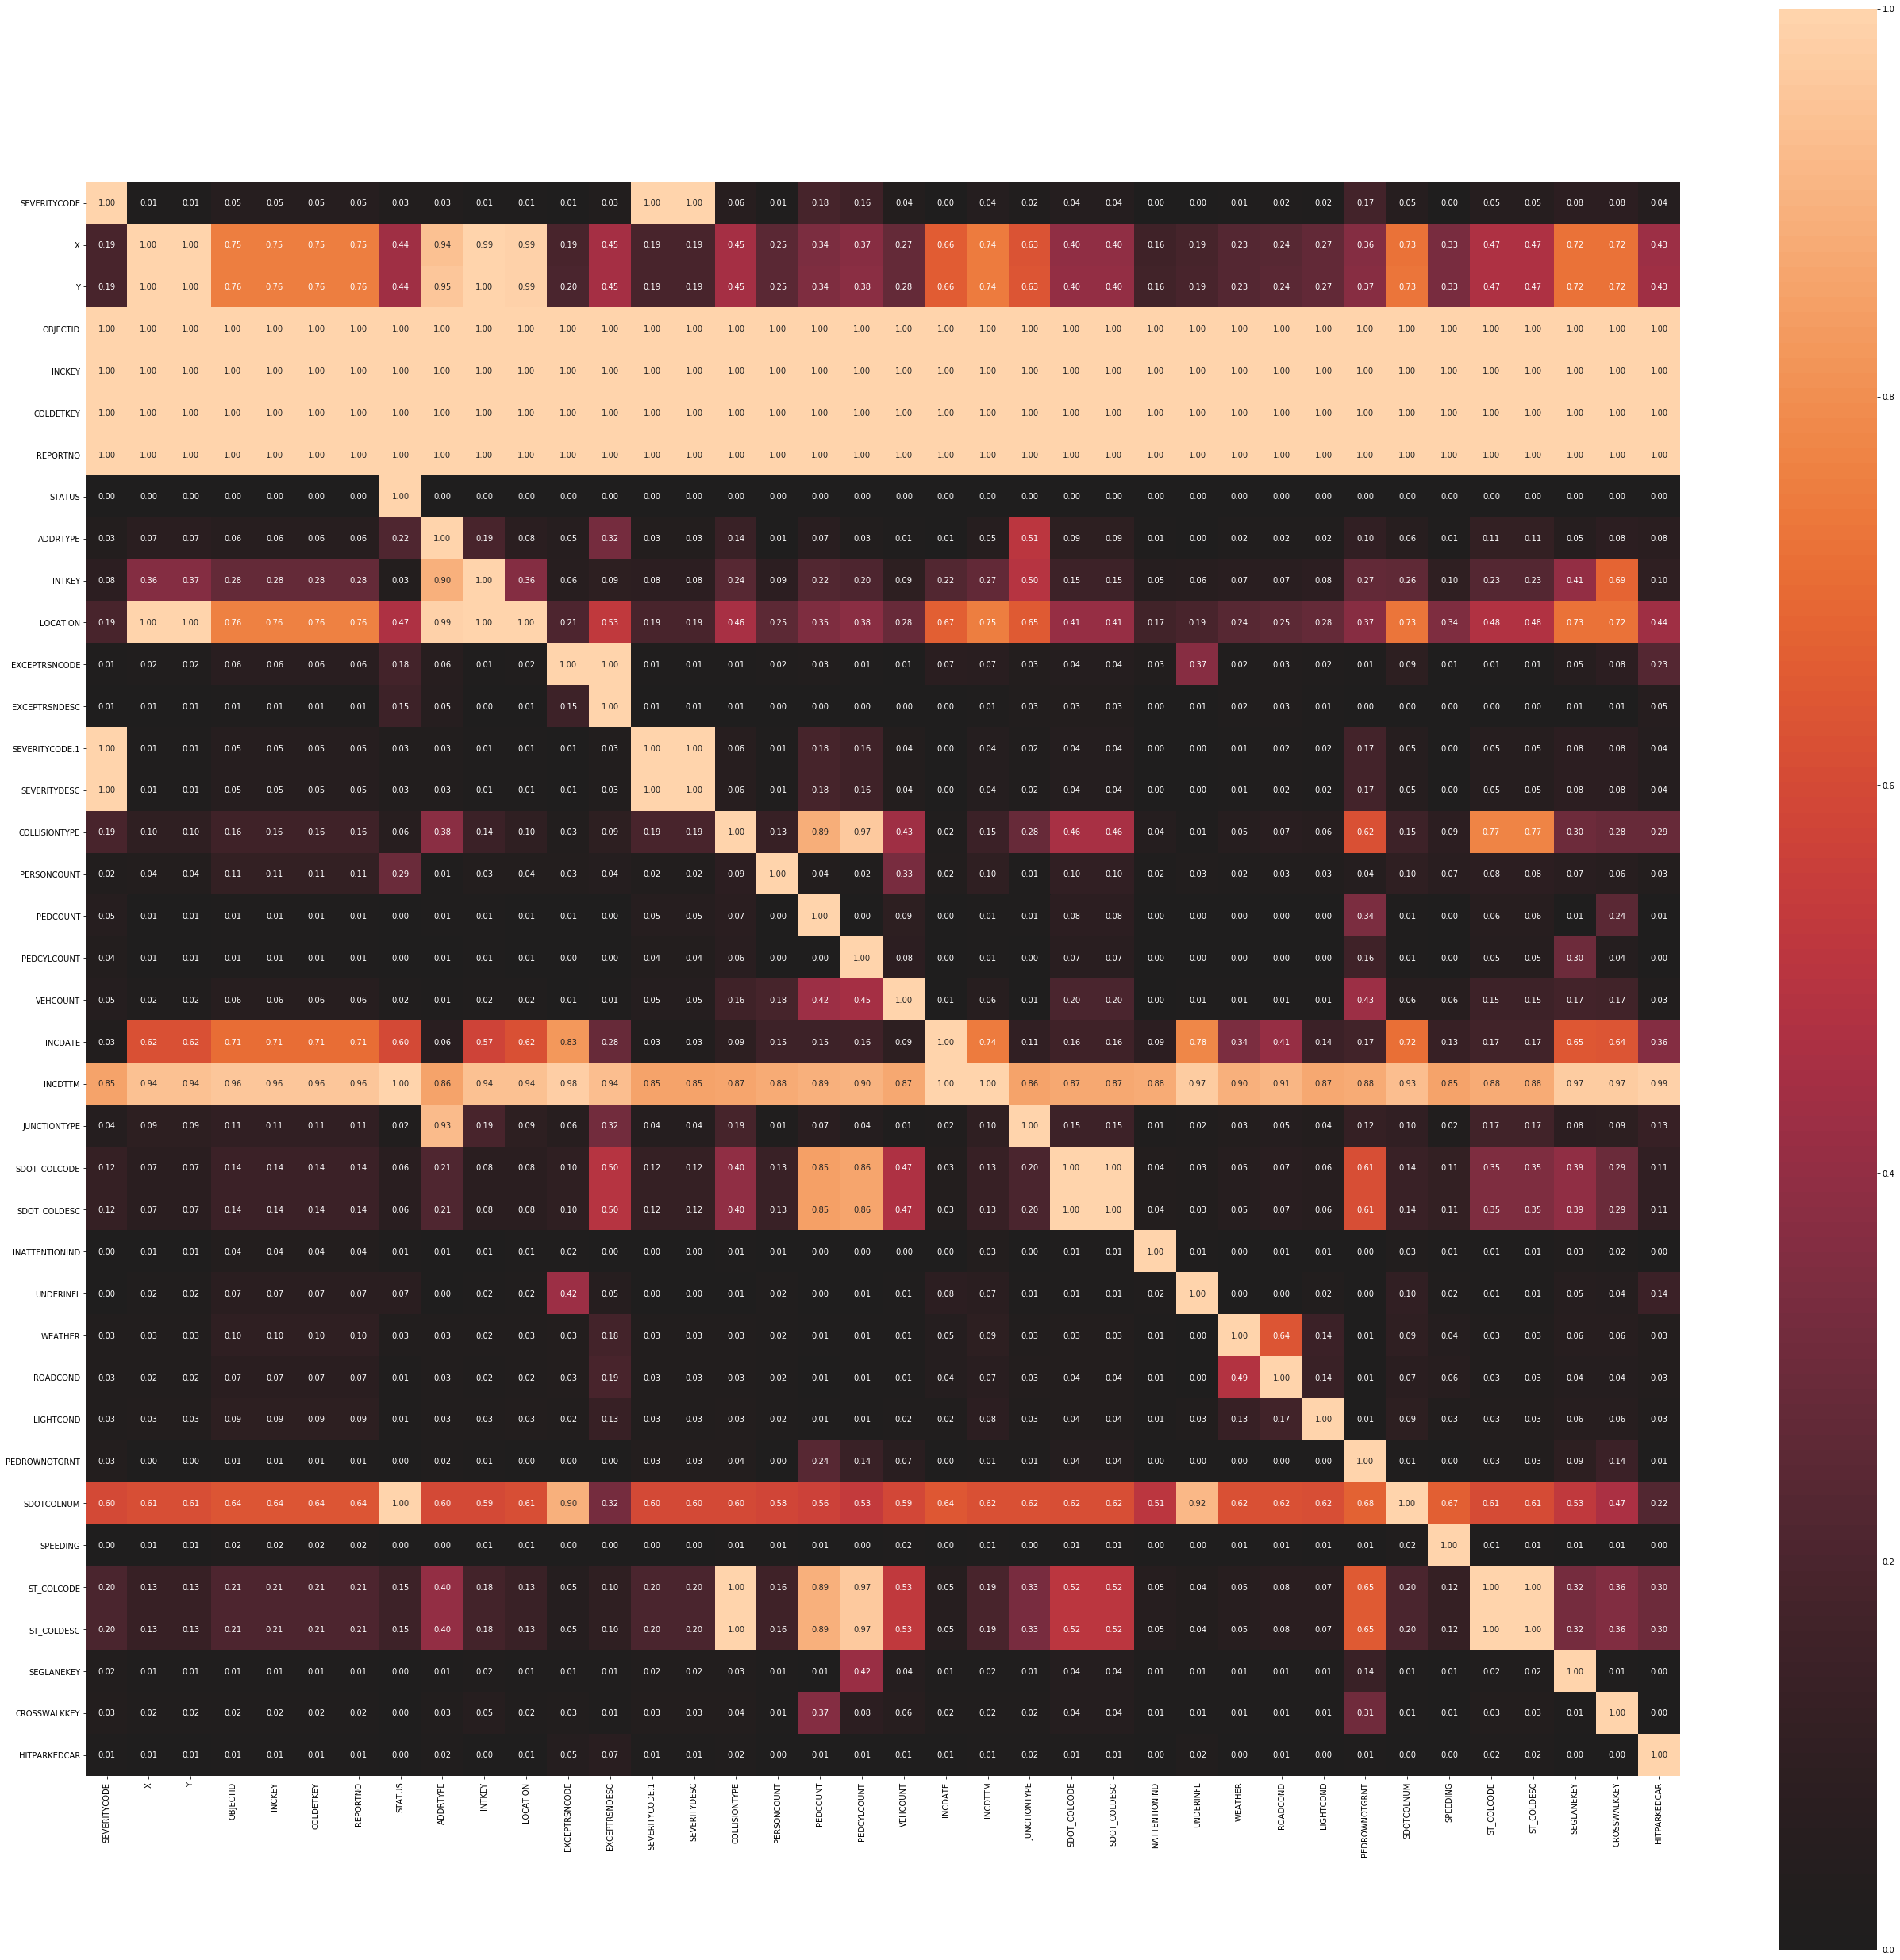

{'corr':                 SEVERITYCODE         X         Y  OBJECTID    INCKEY  \
 SEVERITYCODE        1.000000  0.012664  0.012751  0.050364  0.050364   
 X                   0.189660  1.000000  0.998311  0.754249  0.754249   
 Y                   0.191251  0.999819  1.000000  0.755388  0.755388   
 OBJECTID            1.000000  1.000000  1.000000  1.000000  1.000000   
 INCKEY              1.000000  1.000000  1.000000  1.000000  1.000000   
 COLDETKEY           1.000000  1.000000  1.000000  1.000000  1.000000   
 REPORTNO            1.000000  1.000000  1.000000  0.999998  0.999998   
 STATUS              0.000009  0.000009  0.000009  0.000016  0.000016   
 ADDRTYPE            0.033673  0.073318  0.073992  0.058582  0.058582   
 INTKEY              0.079442  0.364894  0.365340  0.277137  0.277137   
 LOCATION            0.194575  0.999993  0.999993  0.761479  0.761479   
 EXCEPTRSNCODE       0.008428  0.016457  0.016562  0.063892  0.063892   
 EXCEPTRSNDESC       0.005442  0.005837  0.

In [12]:
associations(df_data_1, theil_u=True, figsize=(45, 45))

In [13]:
df_data_1['LIGHTCOND'].value_counts()

Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [14]:
df_data_1['ROADCOND'].value_counts()

Dry               124300
Wet                47417
Unknown            15031
Ice                 1206
Snow/Slush           999
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64

In [15]:
df_data_1.replace({'LIGHTCOND' : 'Dark - No Street Lights'}, {'LIGHTCOND' : 'Dark - Street Lights Off'}, regex=True, inplace=True)
df_data_1.replace({'LIGHTCOND' : 'Dark - Unknown Lighting'}, {'LIGHTCOND' : 'Unknown'}, regex=True, inplace=True)
df_data_1.replace({'ROADCOND' : 'Snow/Slush'}, {'ROADCOND' : 'Ice'}, regex=True, inplace=True)

In [16]:
df_data_1['LIGHTCOND'].value_counts()

Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13467
Dusk                          5889
Dark - Street Lights Off      2727
Dawn                          2502
Other                          235
Name: LIGHTCOND, dtype: int64

In [17]:
df_data_1['ROADCOND'].value_counts()

Dry               124300
Wet                47417
Unknown            15031
Ice                 2205
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64

In [18]:
df_data_1.drop(df_data_1.loc[df_data_1['ROADCOND']=='Unknown'].index, inplace=True)
df_data_1.drop(df_data_1.loc[df_data_1['ROADCOND']=='Other'].index, inplace=True)
df_data_1.drop(df_data_1.loc[df_data_1['LIGHTCOND']=='Unknown'].index, inplace=True)
df_data_1.drop(df_data_1.loc[df_data_1['LIGHTCOND']=='Other'].index, inplace=True)

In [19]:
df_data_1['ROADCOND'].value_counts()

Dry               122191
Wet                46714
Ice                 1995
Standing Water       108
Sand/Mud/Dirt         68
Oil                   63
Name: ROADCOND, dtype: int64

In [20]:
df_data_1['LIGHTCOND'].value_counts()

Daylight                    113230
Dark - Street Lights On      47183
Dusk                          5706
Dark - Street Lights Off      2579
Dawn                          2441
Name: LIGHTCOND, dtype: int64

In [21]:
df_data_1['SEVERITYCODE'].value_counts()

1    115192
2     55947
Name: SEVERITYCODE, dtype: int64

In [22]:
df_data_1.replace({'SEVERITYCODE' : '1'}, {'SEVERITYCODE' : 'prop damage'}, regex=True, inplace=True)
df_data_1.replace({'SEVERITYCODE' : '2'}, {'SEVERITYCODE' : 'injury'}, regex=True, inplace=True)

In [23]:
df_data_1['SEVERITYCODE'].value_counts()

prop damage    115192
injury          55947
Name: SEVERITYCODE, dtype: int64

In [24]:
Feature = pd.concat([pd.get_dummies(df_data_1['ROADCOND']),pd.get_dummies(df_data_1['LIGHTCOND'])], axis=1)
Feature.head()

,Dry,Ice,Oil,Sand/Mud/Dirt,Standing Water,Wet,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,1,0


In [25]:
Feature.dtypes

Dry                         uint8
Ice                         uint8
Oil                         uint8
Sand/Mud/Dirt               uint8
Standing Water              uint8
Wet                         uint8
Dark - Street Lights Off    uint8
Dark - Street Lights On     uint8
Dawn                        uint8
Daylight                    uint8
Dusk                        uint8
dtype: object

In [26]:
X = Feature
X[0:5]

,Dry,Ice,Oil,Sand/Mud/Dirt,Standing Water,Wet,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,1,0


In [27]:
y = df_data_1['SEVERITYCODE'].values
y[0:5]

array(['injury', 'prop damage', 'prop damage', 'prop damage', 'injury'],
      dtype=object)

In [28]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-1.57998198, -0.10860333, -0.01919003, -0.0199373 , -0.02512896,
         1.63203811, -0.12369394, -0.61696283, -0.12028983,  0.71514199,
        -0.18571835],
       [-1.57998198, -0.10860333, -0.01919003, -0.0199373 , -0.02512896,
         1.63203811, -0.12369394,  1.62084319, -0.12028983, -1.39832371,
        -0.18571835],
       [ 0.63291861, -0.10860333, -0.01919003, -0.0199373 , -0.02512896,
        -0.61273079, -0.12369394, -0.61696283, -0.12028983,  0.71514199,
        -0.18571835],
       [ 0.63291861, -0.10860333, -0.01919003, -0.0199373 , -0.02512896,
        -0.61273079, -0.12369394, -0.61696283, -0.12028983,  0.71514199,
        -0.18571835],
       [-1.57998198, -0.10860333, -0.01919003, -0.0199373 , -0.02512896,
         1.63203811, -0.12369394, -0.61696283, -0.12028983,  0.71514199,
        -0.18571835]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (136911, 11) (136911,)
Test set: (34228, 11) (34228,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)

    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.61969732, 0.57423747, 0.62881267, 0.62854973, 0.62892953,
       0.62866659, 0.62904639, 0.62866659, 0.62872502, 0.62866659,
       0.62872502, 0.62872502, 0.636438  , 0.63637957, 0.63640879,
       0.63640879, 0.67181839, 0.67175996, 0.67175996])

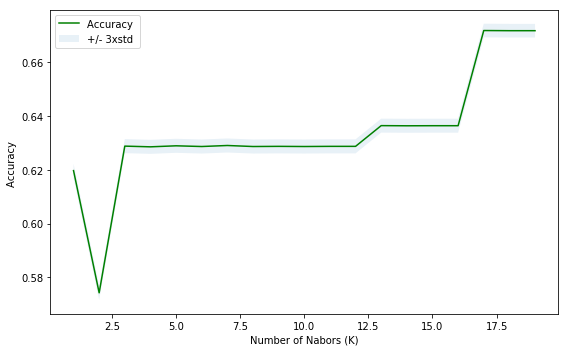

In [31]:
plt.figure(figsize=(8,5))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.xscale('linear')
plt.show()

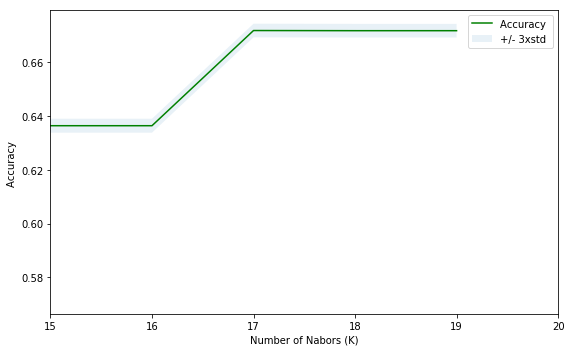

In [32]:
plt.figure(figsize=(8,5))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.xscale('linear')
plt.xlim(15,20)
plt.show()

In [33]:
k = 17
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

depth_range = range(1, 10)
jaccard_similarity_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    jaccard_similarity_score_.append(jaccard_similarity_score(y_test, dt_yhat))
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted'))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
result = pd.DataFrame([jaccard_similarity_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9'])
result.columns.name = 'Evaluation Metrices'
result

Evaluation Metrices,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9
Jaccard,0.672169,0.672169,0.672169,0.671906,0.671906,0.671848,0.671848,0.671848,0.671848
F1,0.540389,0.540389,0.540389,0.540263,0.540263,0.540235,0.540235,0.540235,0.540235


In [36]:
loanTree = DecisionTreeClassifier(criterion='gini', max_depth = 3 )
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
from sklearn import svm
from sklearn.metrics import f1_score 
kernel_func = ['sigmoid', 'poly', 'rbf', 'linear']
accuracy_score = []

for k in kernel_func:
    
    ln = svm.SVC(C=0.01, gamma='auto', kernel=k)
    ln.fit(X_train, y_train)
    svc_yhat = ln.predict(X_test)
    accuracy_score.append(f1_score(y_test, svc_yhat, average = 'weighted'))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  from ipykernel import kernelapp as app


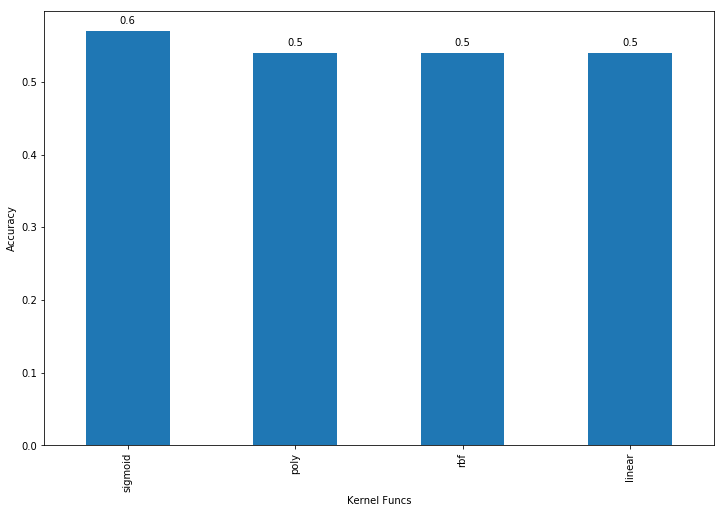

In [38]:
y_pos = np.arange(len(kernel_func))
freq_series = pd.Series.from_array(accuracy_score)
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
#ax = plt.bar(y_pos, accuracy_score, align='center', alpha=0.8)
ax.set_xticklabels(kernel_func)
ax.set_xlabel('Kernel Funcs')
ax.set_ylabel('Accuracy')


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("image.png")

In [39]:
ln = svm.SVC(C = 0.01, gamma = 'auto', kernel = 'sigmoid')
ln.fit(X_train, y_train)
ln

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))
                              
    print('\n')

Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.6316701029161814
Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.6316700875661573
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.6316698193864787
Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.6316701085223504
Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.6316708885827811


Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.6316698353438042
Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.6316698379797544
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.631667487325514
Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.6316698406415793
Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.6316697835338967


Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.6316680645081749
Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.6316680300527436
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.6316993648102899
Test 14: Accuracy at C = 0.001 wh

Text(0, 0.5, 'Testing Accuracy')

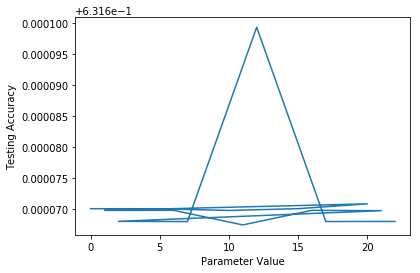

In [41]:
lr_prob = lr_model.predict_proba(X_test)
log_loss(y_test, lr_prob)
plt.plot(index, accuracy_score)
plt.xlabel('Parameter Value')
plt.ylabel('Testing Accuracy')

In [42]:
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [64]:
np.array(y_test)

array(['injury', 'injury', 'prop damage', ..., 'prop damage', 'injury',
       'injury'], dtype=object)

In [67]:
KNN_yhat = neigh.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, KNN_yhat))
print("KNN F1-score: %.2f" % f1_score(np.array(y_test), KNN_yhat, average='weighted') )

KNN Jaccard index: 0.67
KNN F1-score: 0.54


In [68]:
Tree_yhat = loanTree.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, Tree_yhat))
print("DT F1-score: %.2f" % f1_score(np.array(y_test), Tree_yhat, average='weighted') )

DT Jaccard index: 0.67
DT F1-score: 0.54


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
yhat_svm = ln.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_svm))
print("SVM F1-score: %.2f" % f1_score(y_test, yhat_svm, average='weighted') )

SVM Jaccard index: 0.64
SVM F1-score: 0.57


In [47]:
yhat_reg = LR.predict(X_test)
yhat_reg_prob = LR.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_reg))
print("LR F1-score: %.2f" % f1_score(y_test, yhat_reg, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_reg_prob))

LR Jaccard index: 0.67
LR F1-score: 0.54
LR LogLoss: 0.63


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
J1 = round(jaccard_similarity_score(y_test, KNN_yhat),2)
J2 = round(jaccard_similarity_score(y_test, Tree_yhat),2)
J3 = round(jaccard_similarity_score(y_test, yhat_svm),2)
J4 = round(jaccard_similarity_score(y_test, yhat_reg),2)

F1 = round(f1_score(y_test, KNN_yhat, average='weighted'),2)
F2 = round(f1_score(y_test, Tree_yhat, average='weighted'),2)
F3 = round(f1_score(y_test, yhat_svm, average='weighted'),2)
F4 = round(f1_score(y_test, yhat_reg, average='weighted'),2)

j_list = [J1, J2, J3, J4]
f_list = [F1, F2, F3, F4]
lg_list = ['NA', 'NA', 'NA', round(log_loss(y_test, yhat_reg_prob),2)]

columns = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
index = ['Jaccard', 'F1-Score', 'Logloss']

dfc = pd.DataFrame([j_list, f_list, lg_list], index = index, columns = columns)

final_table = dfc.transpose()
final_table.columns.name = 'Algorithm'
final_table

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Algorithm,Jaccard,F1-Score,Logloss
KNN,0.67,0.54,NA
Decision Tree,0.67,0.54,NA
SVM,0.64,0.57,NA
Logistic Regression,0.67,0.54,0.63


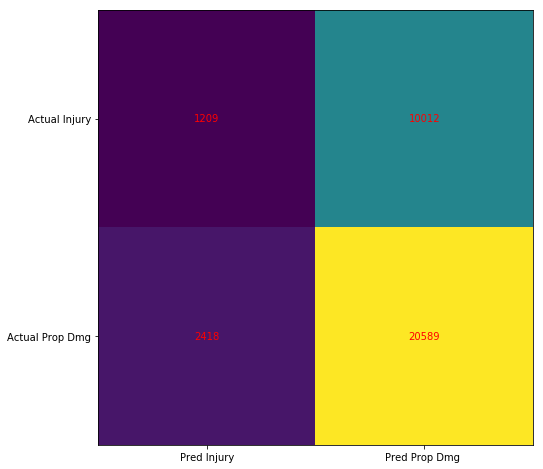

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, yhat_svm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred Injury', 'Pred Prop Dmg '))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Injury', 'Actual Prop Dmg'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [62]:
print(classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

      injury       0.33      0.11      0.16     11221
 prop damage       0.67      0.89      0.77     23007

   micro avg       0.64      0.64      0.64     34228
   macro avg       0.50      0.50      0.47     34228
weighted avg       0.56      0.64      0.57     34228



In [69]:
ln2 = svm.SVC(C = 0.01, gamma = 'auto', kernel = 'sigmoid', class_weight='balanced')
ln2.fit(X_train, y_train)
yhat_svm2 = ln2.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_svm2))
print("SVM F1-score: %.2f" % f1_score(y_test, yhat_svm2, average='weighted') )

SVM Jaccard index: 0.44
SVM F1-score: 0.43


In [70]:
ln3 = svm.SVC(gamma = 'auto', kernel = 'sigmoid', class_weight='balanced')
ln3.fit(X_train, y_train)
yhat_svm3 = ln3.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_svm3))
print("SVM F1-score: %.2f" % f1_score(y_test, yhat_svm3, average='weighted') )

SVM Jaccard index: 0.55
SVM F1-score: 0.55


In [71]:
ln4 = svm.SVC(gamma = 'auto', kernel = 'sigmoid')
ln4.fit(X_train, y_train)
yhat_svm4 = ln4.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_svm4))
print("SVM F1-score: %.2f" % f1_score(y_test, yhat_svm4, average='weighted') )

SVM Jaccard index: 0.67
SVM F1-score: 0.55
